In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import beta

class MAB():
    def __init__(self, n_arms, eps):
        self.Q = np.zeros(n_arms)   #Initial the action values
        self.N = np.zeros(n_arms)   #Initital number of each action
        self.n_arms = n_arms        
        self.eps = eps
        self.rewards = []
        self.iters = 0   # Keep the total count on the steps
        
    def selectAct(self):
        #Select the action acording the current history. This is the core of each alg
        pass
        
    def bandit(self, a):
        #Return the a random value given the action
        return np.random.normal(loc=3*a)
        
    def update(self, iters):
        #Perform the update and keep all the average rewards at each step
        total_rewards = 0
        while True:   
            self.iters+=1
            a = self.selectAct()
            r = self.bandit(a)
            total_rewards +=r
            avg_reward= 1.0 * total_rewards/self.iters
            self.rewards.append(avg_reward)
                        
            ## Need to update the action value/and iteration number
            self.N[a] +=1
            self.Q[a] = self.Q[a] + 1.0 /self.N[a] * (r - self.Q[a])  
            if self.iters > iters:
                return 0
    
n = 10000

### 1: e-Greedy Algorithm:

[]

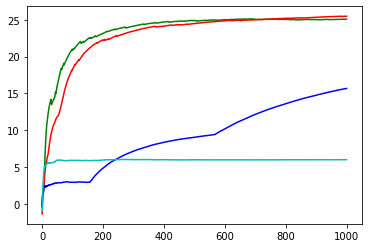

In [159]:
class SimpleAlgs(MAB):
    def __init__(self, n_arms, eps):
        super().__init__(n_arms, eps)  # Will inheriate all the methods and properties
        
    def selectAct(self):
        Ps = []
        As = []

        #Select the action according the e-greedy policy
        a_max = np.argmax(self.Q)           
        p_max=1.0 - self.eps
            
        Ps.append(p_max)
        As.append(a_max)
   
        for i in range(self.n_arms):
            As.append(i)
            Ps.append(1.0*self.eps/self.n_arms)
        
        a = np.random.choice(As, p=Ps)
        return a
    
    def update(self, iters):
        #Perform the update and keep all the average rewards at each step
        total_rewards = 0
        while True:   
            self.iters+=1
            a = self.selectAct()
            r = self.bandit(a)
            total_rewards +=r
            avg_reward= 1.0 * total_rewards/self.iters
            self.rewards.append(avg_reward)
                        
            ## Need to update the action value/and iteration number
            self.N[a] +=1
            self.Q[a] = self.Q[a] + 1.0 /self.N[a] * (r - self.Q[a])  
            if self.iters > iters:
                return 0
        

app_Egreedy1 = SimpleAlgs(10, 0.1)
app_Egreedy1.update(n)  

app_Egreedy2 = SimpleAlgs(10, 0.05)
app_Egreedy2.update(n)  

app_Egreedy3 = SimpleAlgs(10, 0.01)
app_Egreedy3.update(n) 

app_greedy = SimpleAlgs(10, 0.0)
app_greedy.update(n) 

plt.plot(app1.rewards,'g', label= 'e = 0.1')
plt.plot(app2.rewards, 'r', label= 'e = 0.05')
plt.plot(app3.rewards, 'b', label= 'e = 0.03')
plt.plot(app4.rewards, 'c', label= 'e = 0.0')
plt.plot(lagend=True)

### 2: Upper Confidence Bound


The formula is on page p27(Sutton, Barto)
a(t) = argmax(Q(a) + c*sqrt(ln(t)/N(a)))

[]

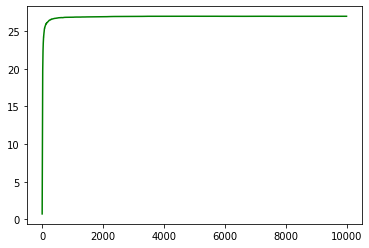

In [162]:
class UCB(MAB):  #Upper Confidence Bound
    def __init__(self, n_arms, eps, c):
        super().__init__(n_arms, eps)  # Will inheriate all the methods and properties
        self.c = c    
        
    def selectAct(self):
        # This is a direct action select from the ation preference
        #Hold the preferenc of each action
        A=np.zeros(self.n_arms)
        
        for a in range(self.n_arms):
            if self.N[a] == 0:
                return a
            else:
                A[a] = self.Q[a] + 1.0* self.c * np.sqrt(np.log(1.0*self.iters/self.N[a])) 
        return np.argmax(A)
    
    def update(self, iters):
        #Perform the update and keep all the average rewards at each step
        total_rewards = 0
        while True:   
            self.iters+=1
            a = self.selectAct()
            r = self.bandit(a)
            total_rewards +=r
            avg_reward= 1.0 * total_rewards/self.iters
            self.rewards.append(avg_reward)
                        
            ## Need to update the action value/and iteration number
            self.N[a] +=1
            self.Q[a] = self.Q[a] + 1.0 /self.N[a] * (r - self.Q[a])  
            if self.iters > iters:
                return 0
        
app_ucb1 = UCB(10, 0.1,1)
app_ucb1.update(n)  

plt.plot(app_ucb1.rewards,'g', label= 'e = 0.1')
#plt.plot(app1.rewards,'g', label= 'e = 0.1')
#plt.plot(app2.rewards, 'r', label= 'e = 0.05')
#plt.plot(app3.rewards, 'b', label= 'e = 0.03')
#plt.plot(app4.rewards, 'c', label= 'e = 0.0')
plt.plot()


### 3: Gradient Bandit Algs


Defination:

    pi(a/t): Probability of taking action a at time t

The formula is on page p29(Sutton, Barto)

[]

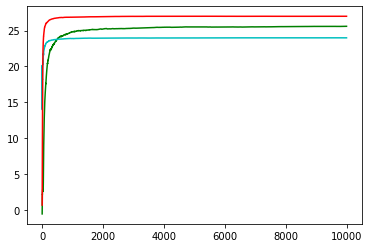

In [163]:
class GBA(MAB): 
    #Gradient Bandit Alg
    def __init__(self, n_arms, eps, alpha):
        super().__init__(n_arms, eps)  # Will inheriate all the methods and properties
        self.h = np.zeros(self.n_arms)  #initial all the preferences
        self.p = np.zeros(self.n_arms)  
        self.alpha = alpha
                     
    def selectAct(self):
        denominator = 0
        for a in range(self.n_arms):
            denominator +=np.exp(self.h[a])
        
        for a in range(self.n_arms):
            self.p[a] = 1.0 * np.exp(self.h[a]) / denominator
        
        a = np.random.choice(self.n_arms, p=self.p)
        return a
    
    def update(self, iters):
        #Perform the update and keep all the average rewards at each step
        total_rewards = 0
        while True:   
            self.iters+=1
            a = self.selectAct()
            r = self.bandit(a)
            total_rewards +=r
            avg_reward= 1.0 * total_rewards/self.iters
            self.rewards.append(avg_reward)
                        
            ## Need to update the preference self.h
            for i in range(self.n_arms):
                if i ==a:
                    self.h[i] = self.h[i] + self.alpha*(r - avg_reward) * (1.0 - self.p[i])
                else:
                    self.h[i] = self.h[i] - self.alpha*(r-avg_reward) * self.p[i]
            if self.iters > iters:
                return 0
app_gba1 = GBA(10,1,0.1)
app_gba1.update(n)  

plt.plot(app_Egreedy1.rewards,'g', label= 'e = 0.1')
plt.plot(app_gba1.rewards,'c', label= 'e = 0.1')
plt.plot(app_ucb1.rewards,'r', label= 'e = 0.1')
plt.plot()

### 4: Thompson Sampling 

[]

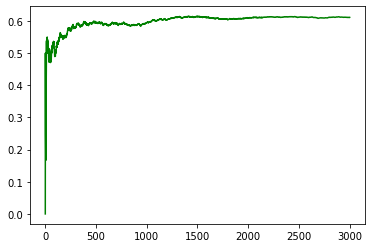

In [80]:
class ThompsonSampling(MAB): 
    def __init__(self, n_arms, eps):
        super().__init__(n_arms, eps)  # Will inheriate all the methods and properties
        
        #Initial the alphas and betas to one assuming a uniform distrbution from begining. 
        self.As=np.ones(n_arms)
        self.Bs = np.ones(n_arms)
        
    def selectAct(self):
        ## take a random sample for each arm and select arm with the highest rewards
        samps = np.zeros(self.n_arms)
        for i in range(self.n_arms):
            samps[i] = np.random.beta(self.As[i], self.Bs[i])
        
        return np.argmax(samps)
        
    def bandit(self, a):
        #Return the a random value given the action
        #return np.random.normal(loc=3*a)
        
        #Only work with Bernoulli right now.
        return np.random.binomial(1,0.25*a+0.11) 
        
    def update(self, iters):
        #Perform the update and keep all the average rewards at each step
        total_rewards = 0
        while True:   
            self.iters+=1
            a = self.selectAct()
            r = self.bandit(a)
            total_rewards +=r
            avg_reward= 1.0 * total_rewards/self.iters
            self.rewards.append(avg_reward)
                        
            ## Need to update the action value/and iteration number
            if r == 1:
                self.As[a]+=1
            else:
                self.Bs[a]+=1
            if self.iters > iters:
                return 0
app_TS = ThompsonSampling(3,0.1)
app_TS.update(3000)  

plt.plot(app_TS.rewards,'g', label= 'e = 0.1')
plt.plot()

### 5: Context Bandit


It might need to put Update and select-action together since the action value is the function of the user/item context

In [7]:
for i in range(10):
    print (np.random.binomial(1, 0.9))

1
1
1
1
1
1
1
1
1
0
